In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
device = 'cpu'
device = torch.device(device)

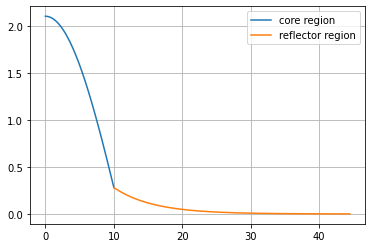

In [4]:
P = 1e-10
Er = 3.2e-11
ef = 0.1076
v_ef = 0.1076
ea = 0.062158
D1 = 2.2008
ea_r = 0.06425
D2 = 2.0950
a = 20
B = 40
B_ex = B + 0.7104 * 3 * D2
Bg = np.sqrt((v_ef - ea) / D1)
lr = np.sqrt(D2 / ea_r)
A1 = P * Bg / (Er * ef * ((np.sin(Bg * 0.5 * a)) - (np.sin(-Bg * 0.5 * a))))
A2 = A1 * np.cos(Bg * 0.5 * a) / np.sinh(B_ex / lr)

def y_core(x):
    return A1 * np.cos(Bg * x)

def y_reflect(x):
    return A2 * np.sinh((B_ex + 0.5 * a - x) / lr)

def diff_x(a,b,create_graph=True):
    da_db = torch.autograd.grad(a.sum(),b,create_graph=create_graph,allow_unused=True)[0]
    return da_db

def data_loader(x, requires_grad=True):
    x_array = np.array(x)
    x_tensor = torch.tensor(x_array,
                    requires_grad=requires_grad,
                            dtype=torch.float32,
                            device=device)
    return x_tensor

#analytical solution
x_core_analytical = data_loader(np.linspace(0,a/2,1000),False)
x_reflect_analytical = data_loader(np.linspace(a/2,B_ex,1000),False)
x_pred_core = np.linspace(0,a/2,5000)
x_pred_reflect = np.linspace(a/2,B_ex,5000)
plt.plot(x_core_analytical,y_core(x_core_analytical),label='core region')
plt.plot(x_reflect_analytical,y_reflect(x_reflect_analytical),label='reflector region')
plt.grid()
plt.legend()
# np.random.shuffle(x_core_analytical)
# np.random.shuffle(x_reflect_analytical)

In [5]:
class Pinns(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(1,40)
        self.layer2 = nn.Linear(40,40)
        self.layer3 = nn.Linear(40,40)
        self.layer4 = nn.Linear(40,1)
        
    def forward(self,x):
        act1 = torch.tanh(self.layer1(x))
        act2 = torch.tanh(self.layer2(act1))
        act3 = torch.tanh(self.layer3(act2))
        act4 = self.layer4(act3)
        return act4

 Epoch [0/20000] Total Loss: 4.49252987


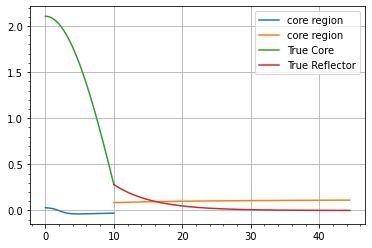

 Epoch [400/20000] Total Loss: 0.02010839


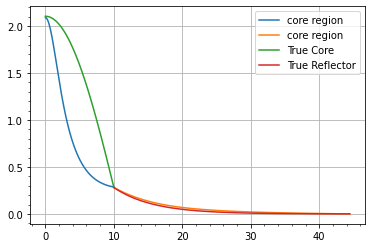

 Epoch [800/20000] Total Loss: 0.01042422


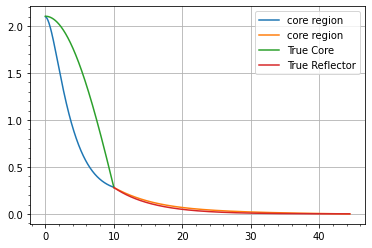

 Epoch [1200/20000] Total Loss: 0.00571304


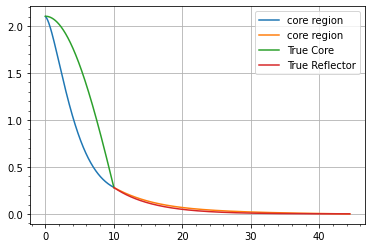

 Epoch [1600/20000] Total Loss: 0.00331325


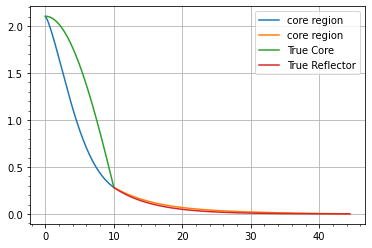

 Epoch [2000/20000] Total Loss: 0.00212223


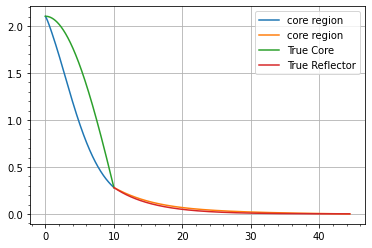

 Epoch [2400/20000] Total Loss: 0.00153244


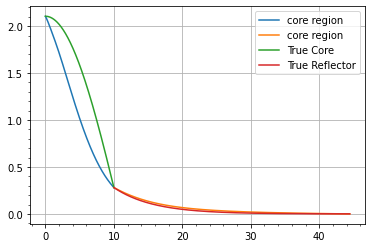

 Epoch [2800/20000] Total Loss: 0.00119899


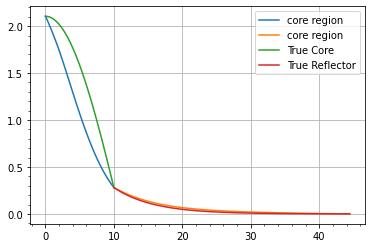

 Epoch [3200/20000] Total Loss: 0.00097076


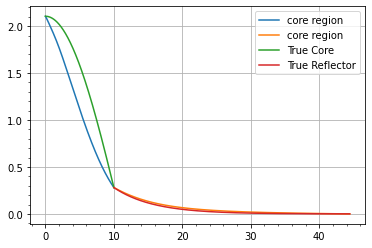

 Epoch [3600/20000] Total Loss: 0.00079512


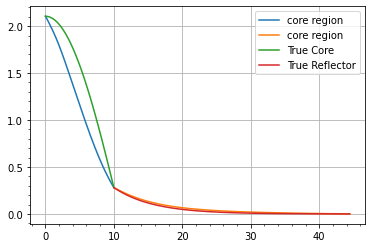

 Epoch [4000/20000] Total Loss: 0.00065183


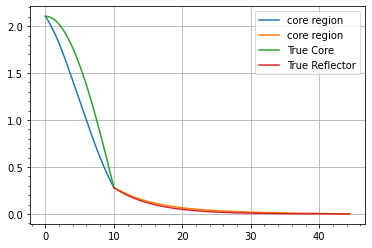

 Epoch [4400/20000] Total Loss: 0.00052731


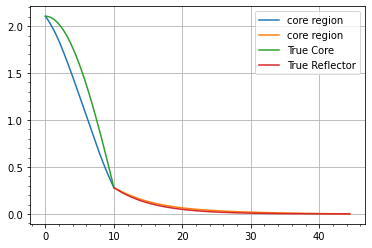

 Epoch [4800/20000] Total Loss: 0.00042406


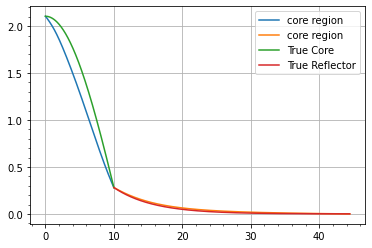

 Epoch [5200/20000] Total Loss: 0.00033824


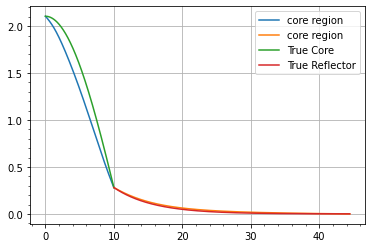

 Epoch [5600/20000] Total Loss: 0.00026797


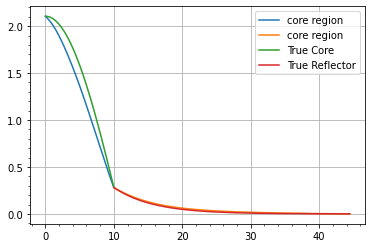

 Epoch [6000/20000] Total Loss: 0.00021062


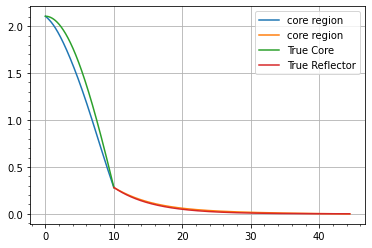

 Epoch [6400/20000] Total Loss: 0.00016279


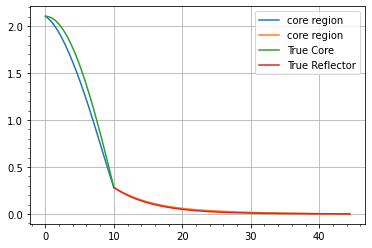

 Epoch [6800/20000] Total Loss: 0.00012801


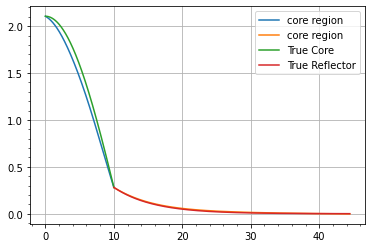

 Epoch [7200/20000] Total Loss: 0.00008993


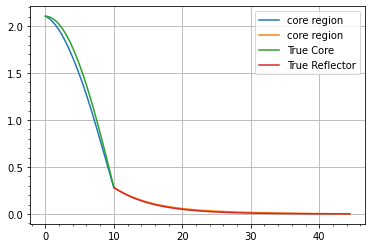

 Epoch [7600/20000] Total Loss: 0.00006623


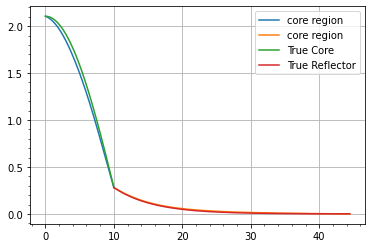

 Epoch [8000/20000] Total Loss: 0.00004919


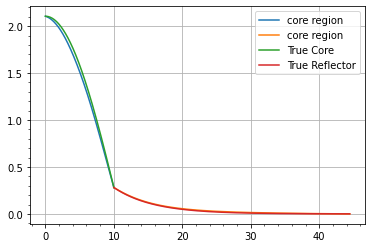

 Epoch [8400/20000] Total Loss: 0.00003659


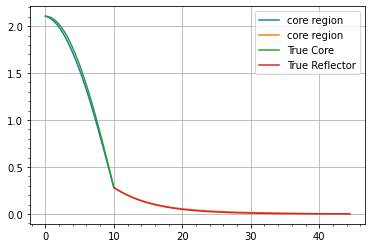

 Epoch [8800/20000] Total Loss: 0.00002739


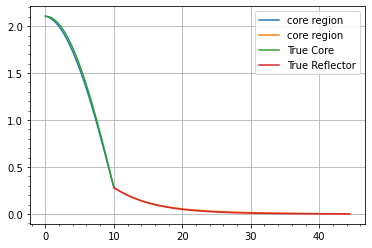

 Epoch [9200/20000] Total Loss: 0.00002073


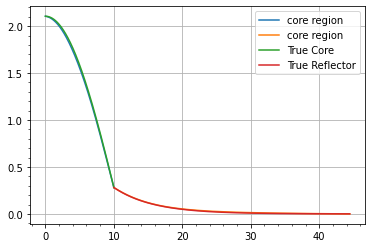

 Epoch [9600/20000] Total Loss: 0.00001652


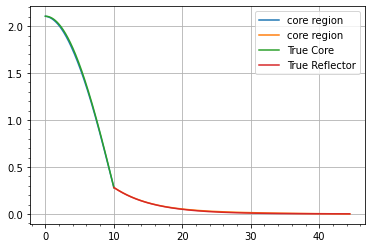

 Epoch [10000/20000] Total Loss: 0.00001294


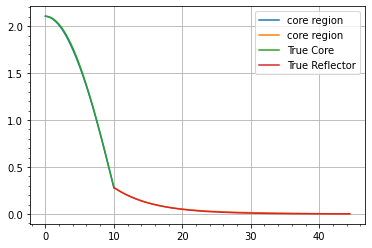

 Epoch [10400/20000] Total Loss: 0.00001063


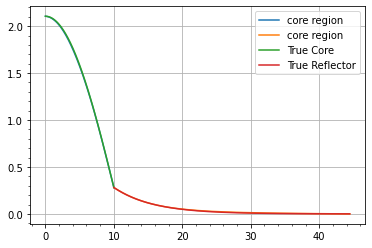

 Epoch [10800/20000] Total Loss: 0.00000961


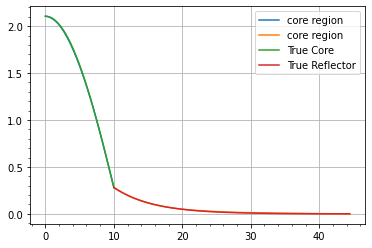

 Epoch [11200/20000] Total Loss: 0.00000749


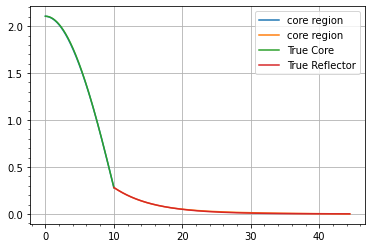

 Epoch [11600/20000] Total Loss: 0.00000635


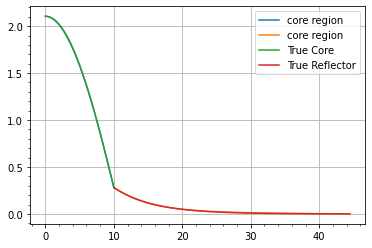

 Epoch [12000/20000] Total Loss: 0.00000537


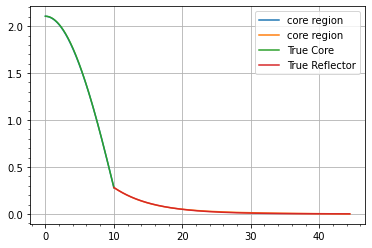

 Epoch [12400/20000] Total Loss: 0.00000460


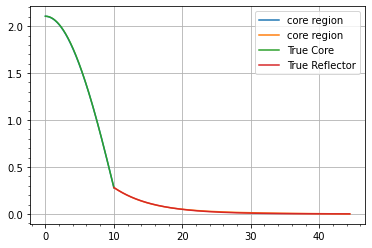

 Epoch [12800/20000] Total Loss: 0.00000388


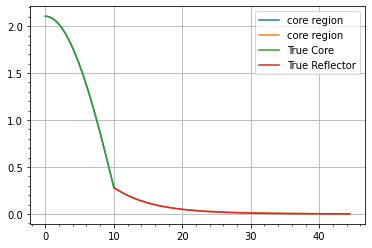

 Epoch [13200/20000] Total Loss: 0.00000331


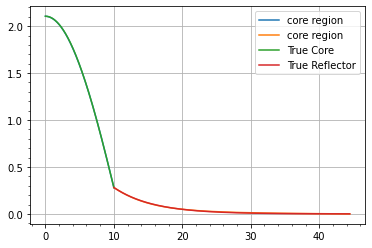

 Epoch [13600/20000] Total Loss: 0.00000284


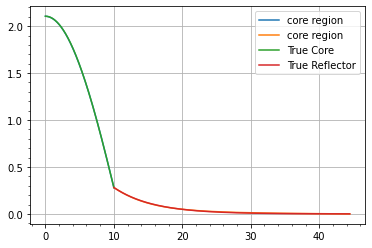

 Epoch [14000/20000] Total Loss: 0.00000243


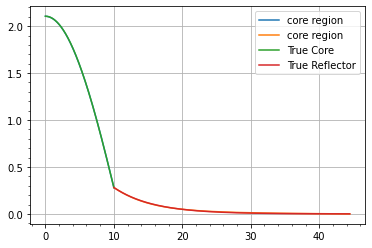

 Epoch [14400/20000] Total Loss: 0.00000210


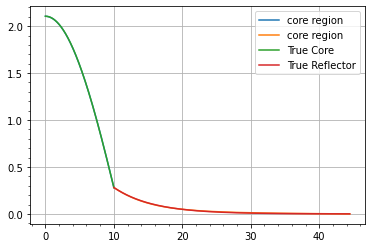

 Epoch [14800/20000] Total Loss: 0.00000421


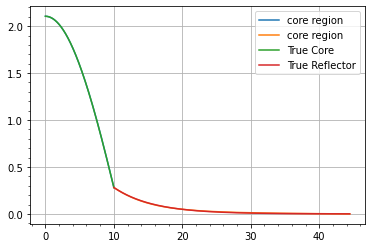

 Epoch [15200/20000] Total Loss: 0.00000160


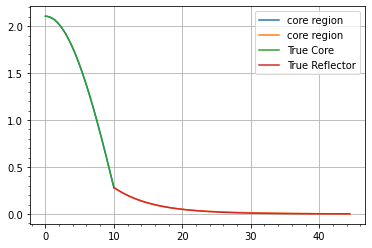

 Epoch [15600/20000] Total Loss: 0.00000142


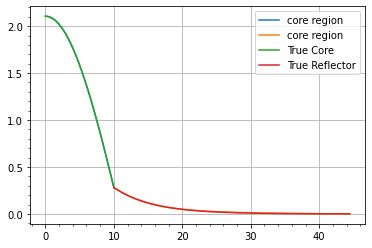

 Epoch [16000/20000] Total Loss: 0.00000129


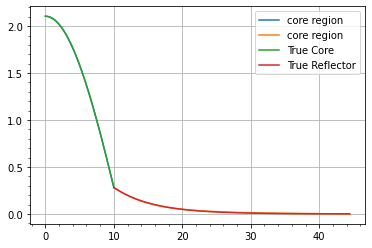

 Epoch [16400/20000] Total Loss: 0.00000134


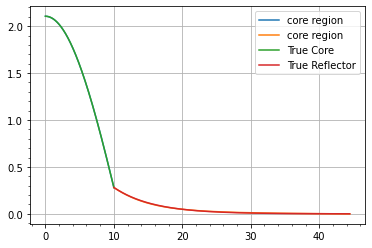

 Epoch [16800/20000] Total Loss: 0.00000106


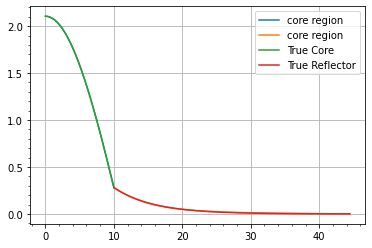

 Epoch [17200/20000] Total Loss: 0.00000098


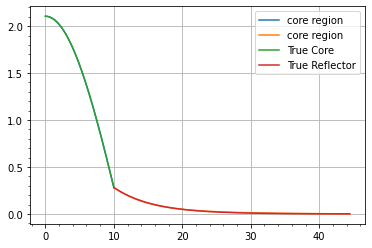

 Epoch [17600/20000] Total Loss: 0.00000095


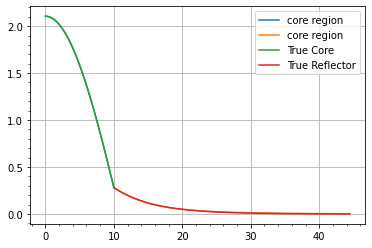

 Epoch [18000/20000] Total Loss: 0.00000229


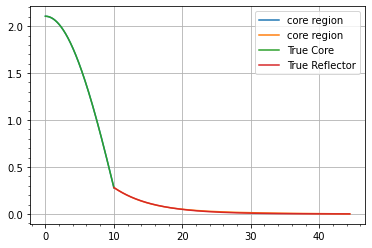

 Epoch [18400/20000] Total Loss: 0.00000080


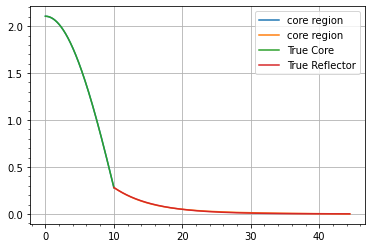

 Epoch [18800/20000] Total Loss: 0.00000136


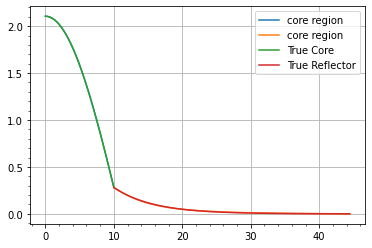

 Epoch [19200/20000] Total Loss: 0.00000071


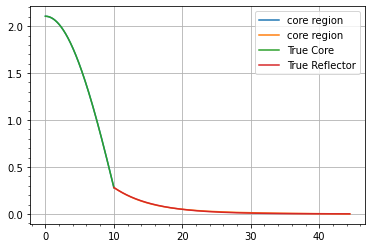

 Epoch [19600/20000] Total Loss: 0.00000258


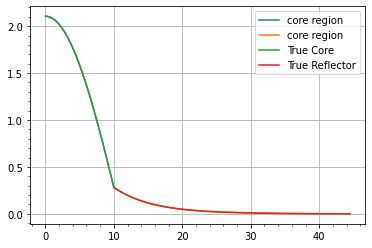

time 13.488808886210125 minutes


In [6]:
v_ef = data_loader(0.1076,False)
ea = data_loader(0.062158,False)
D1 = data_loader(2.2008,False)
ea_r = data_loader(0.06425,False)
D2 = data_loader(2.0950,False)
Bg_square = data_loader([(v_ef - ea) / D1],False)
Lr_square = data_loader([ea_r/D2],False)

NN_core = Pinns()
NN_reflect = Pinns()
NN_core.to(device)
NN_reflect.to(device)
optimizer_core = torch.optim.Adam(NN_core.parameters(),lr=1e-4)
optimizer_reflect = torch.optim.Adam(NN_reflect.parameters(),lr=1e-4)
start_time = time.time()

x_pred_core = data_loader(x_pred_core,False).unsqueeze(1)
x_pred_reflect = data_loader(x_pred_reflect,False).unsqueeze(1)
core_region = data_loader(x_core_analytical).unsqueeze(1)
reflect_region = data_loader(x_reflect_analytical).unsqueeze(1)

core_solution_value_0 = data_loader([2.1055],False)
core_last_value = data_loader([0.2810],False)
reflect_first_value = data_loader([0.2810],False)
epoch = 20000
plot_steps = 400

for i in range(epoch):
    optimizer_core.zero_grad()
    optimizer_reflect.zero_grad()

    
    #data loss
    data_one = NN_core(core_region[0])
    data_one_loss = torch.mean((data_one-core_solution_value_0)**2)

    
    core_end_value = NN_core(core_region[-1])
    data_second_reflect = NN_reflect(reflect_region[0])
    data_second_loss = torch.mean((core_end_value-core_last_value)**2) + torch.mean((data_second_reflect-reflect_first_value)**2)
    
    boundary_loss = NN_reflect(reflect_region[-1])
    tot_boundary_loss = torch.mean(boundary_loss**2)
    
    tot_data_loss = data_one_loss + data_second_loss + tot_boundary_loss
   

    #core region loss
    pinns_core_pred = NN_core(core_region)
    phi_dx_core = diff_x(pinns_core_pred, core_region)
    phi_dx2_core = diff_x(phi_dx_core,core_region)
    eqn_core = phi_dx2_core + Bg_square*pinns_core_pred
    loss_pde_core = torch.mean(eqn_core**2)
    
    #reflect region loss
    pinns_reflect_pred = NN_reflect(reflect_region)
    phi_dx_reflect = diff_x(pinns_reflect_pred,reflect_region)
    phi_dx2_reflect = diff_x(phi_dx_reflect,reflect_region)
    eqn_reflect = phi_dx2_reflect - Lr_square*pinns_reflect_pred
    loss_pde_reflect = torch.mean(eqn_reflect**2)
    
    
    total_loss = tot_data_loss + loss_pde_core + loss_pde_reflect
    total_loss.backward()
    optimizer_core.step()
    optimizer_reflect.step()
    
    if i % plot_steps == 0:
        print(f' Epoch [{i}/{epoch}] Total Loss: {total_loss.item():.8f}')
        NN_pred_core = NN_core(x_pred_core)
        NN_pred_reflect = NN_reflect(x_pred_reflect)
        plt.plot(x_pred_core,NN_pred_core.detach(),label='core region')
        plt.plot(x_pred_reflect,NN_pred_reflect.detach(),label='core region')
        plt.plot(x_core_analytical,y_core(x_core_analytical),label='True Core')
        plt.plot(x_reflect_analytical,y_reflect(x_reflect_analytical),label='True Reflector')
        plt.legend()
        plt.grid()
        plt.minorticks_on()
        #plt.savefig(f'graphs/{i+1}_epoch.jpg')
        plt.show()
        plt.close()
end_time = time.time()
print(f'time {(end_time-start_time)/60} minutes')
        